# Randomized Response

## Definition

One of the fundamental techniques that differential privacy models depend on, is __randomized response__. The simplest application is adding noise to a __binary answer__. 

This is a method developed in the social sciences to collect statistical information about embarrassing or illegal behavior, captured by having a property `P`. Its algorithm is very simple, with the goal to report whether or not a person has the property, while preserving his privacy. The algorithm goes as following:

```
1. Flip a coin
2. If tails, then respond truthfully
3. If heads, flip another coin, and respond "Yes" if heads and "No" if tails
```
Let's now see a simple implementation of the randomized response:

In [1]:
import random

def random_response(true_answer):
    first_coin = random.randint(0,1)
    if (first_coin == 0):
        return true_answer
    else:
        second_coin = random.randint(0,1)
        if (second_coin == 1):
            return 1
        else:
            return 0

It is clear that the answer for a single individual will not be accurate, but that is not our goal. Our goal is to protect a group of people. So, let's see the result of the algorithm, if a survey is run in a large group of people. Let's create a list of people, that answer truthfully if they have the property `P`, and then apply the function that we have created. Then, we are going to check how many individuals have answered yes, on both occasions. We want to observe the difference in the sum, which is defined as the accuracy of the randomized response.

In [2]:
group_size = 1000

true_list = [random.randint(0,1) for _ in range(group_size)]

random_response_list = [random_response(i) for i in true_list]

print("True sum: ", sum(true_list), "Randomized sum:", sum(random_response_list))

True sum:  504 Randomized sum: 503


As we can see, for a rather large group of people, the randomized response algorithm performs very well.

To furthermore check the accuracy of the randomized response algorithm, we are going to test it in datasets of different size, and see the results.

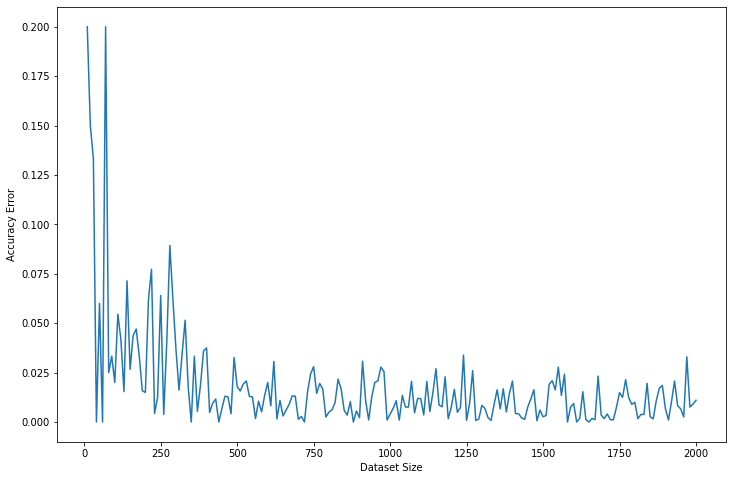

In [3]:
import matplotlib.pyplot as plt

group_sizes = [10 * i for i in range(1,201)]
results = []

for size in group_sizes:
    true_list = [random.randint(0,1) for _ in range(size)]

    random_response_list = [random_response(i) for i in true_list]
    results.append((abs(sum(true_list) - sum(random_response_list))/size))
    
plt.figure(figsize = (12,8))
plt.plot(group_sizes, results, label='Accuracy error')

plt.xlabel('Dataset Size')
plt.ylabel('Accuracy Error')
plt.show()

## Results

Given the definition of randomized response, it is easy to extract the informations that the participants will answer the question truthfully 75% of the time. An accurate estimate of the true number of `Yes` answers can therefore be computed by $2(x-0.25) $ where $x$ refers to the fraction of respondents who answered in the positive. The survey participants are thus given a privacy guarantee of $\epsilon = ln(\frac{0.75}{1-0.75}) = ln(3)$